In [3]:
from __future__ import print_function
%matplotlib inline
import geopandas as gpd
import numpy as np
from censusAPI import myAPI
import pandas as pd
import io
import shapely
from geopandas.tools import sjoin
from geopandas import GeoDataFrame
from matplotlib import pyplot as plt
import os
import zipfile
import json
from fiona.crs import from_epsg
import sys
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib
import requests
!pip install requests

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Census Geographies
census tracts, census blocks, Public Use Microdata Areas (PUMAs) <br>
Each PUMA contains at least 100,000 people. PUMAs do not overlap, and are contained within a single state.



# 1.1 download the NYC Public Use Microdata Areas (PUMA) geometry from the NYC Open Data API and read it in with geopandas

In [4]:
#unpack pluto dataframe in PUIDATA
puidata = os.getenv("PUIDATA")
if not puidata or puidata == '/nfshome/sjs909/PUIdata':
    puidata = '/nfshome/sjs909/PUIDATA'

os.environ["PUIDATA"] = puidata
os.environ["PUIDATA"]

'/nfshome/sjs909/PUIDATA'

In [3]:
with zipfile.ZipFile("%s/Public Use Microdata Areas (PUMA).zip"%os.getenv("PUIDATA"),"r") as zip_ref:
    zip_ref.extractall("PUMAdir")

In [4]:
#Move into PUIDATA
os.rename("/nfshome/sjs909/PUI2018/HW7_sjs909/PUMAdir", "/nfshome/sjs909/PUIDATA/PUMAdir")

OSError: [Errno 39] Directory not empty: '/nfshome/sjs909/PUI2018/HW7_sjs909/PUMAdir' -> '/nfshome/sjs909/PUIDATA/PUMAdir'

In [5]:
# read in the shapefile
PUMAShape = gpd.GeoDataFrame.from_file('%s/PUMAdir/geo_export_6dc93837-8056-4516-82d7-c7f1aaa89882.shp'%os.getenv("PUIDATA"))

In [6]:
PUMAShape.head()

,puma,shape_area,shape_leng,geometry
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...
1,3702,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,..."
2,3703,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...
3,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,4015,8.105438e+07,50007.415493,POLYGON ((-73.95374853778468 40.63858633758547...


In [7]:
PUMAShape.crs

{'init': 'epsg:4326'}

# 1.2 plot the PUMA NYC regions

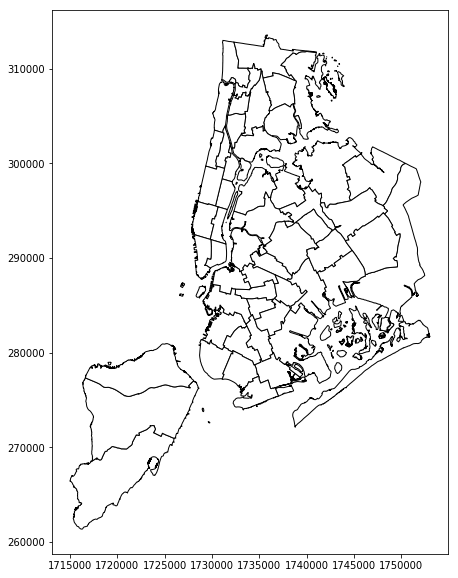

In [7]:
PUMAShape.crs = from_epsg(4326)
naec = '+proj=eqdc +lat_0=40 +lon_0=-96 +lat_1=20 +lat_2=60 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs'
PUMAShape.to_crs(naec).plot(color='white', edgecolor='black',figsize=(10,10))

**Caption** <br>This is a map of the Public Use Microdata Areas (PUMAs) for the NYC region. Each PUMA contains at least 100,000 people

# 2. American Fact Finder data on percentage of houses with broadband internet access

In [9]:
# Manually downloaded and saved into PUIDATA
with zipfile.ZipFile("%s/aff_download.zip"%os.getenv("PUIDATA"),"r") as zip_ref:
    zip_ref.extractall('aff_download')

In [ ]:
#Move 
os.rename("/nfshome/sjs909/PUI2018/HW7_sjs909/aff_download", "/nfshome/sjs909/PUIDATA/aff_download")

In [8]:
pumaBB =  pd.read_csv("%s/aff_download/ACS_16_1YR_B28002_with_ann.csv"%os.getenv("PUIDATA"))

In [9]:
pumaBB.head()

,GEO.id,GEO.id2,GEO.display-label,HD01_VD01,HD02_VD01,HD01_VD02,HD02_VD02,HD01_VD03,HD02_VD03,HD01_VD04,...,HD01_VD09,HD02_VD09,HD01_VD10,HD02_VD10,HD01_VD11,HD02_VD11,HD01_VD12,HD02_VD12,HD01_VD13,HD02_VD13
0,Id,Id2,Geography,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - With an Internet subscription,Margin of Error; Total: - With an Internet sub...,Estimate; Total: - With an Internet subscripti...,Margin of Error; Total: - With an Internet sub...,Estimate; Total: - With an Internet subscripti...,...,Estimate; Total: - With an Internet subscripti...,Margin of Error; Total: - With an Internet sub...,Estimate; Total: - With an Internet subscripti...,Margin of Error; Total: - With an Internet sub...,Estimate; Total: - With an Internet subscripti...,Margin of Error; Total: - With an Internet sub...,Estimate; Total: - Internet access without a s...,Margin of Error; Total: - Internet access with...,Estimate; Total: - No Internet access,Margin of Error; Total: - No Internet access
1,7950000US3600100,3600100,"St. Lawrence County PUMA, New York",40479,1519,32877,1655,270,156,32607,...,2022,554,235,122,31,49,919,401,6683,973
2,7950000US3600200,3600200,"Clinton, Franklin, Essex & Hamilton Counties P...",67092,2054,51186,2044,375,193,50811,...,6041,1106,1043,347,85,62,2972,890,12934,1598
3,7950000US3600300,3600300,"Warren & Washington Counties PUMA, New York",51614,1736,41727,1814,517,211,41210,...,4149,641,915,344,73,56,1403,486,8484,1382
4,7950000US3600401,3600401,Herkimer (North & Central) & Oneida (Outer) Co...,44300,1723,36426,1798,351,195,36075,...,2497,595,414,217,127,82,1418,611,6456,874


In [10]:
#read in in the variables available. the info you need is in the 1year ACS data
url = "https://api.census.gov/data/2016/acs/acs1/variables.json"
resp = requests.request('GET', url)
aff1y = json.loads(resp.text)

In [11]:
affkeys = np.array(list(aff1y['variables'].keys()))

In [15]:
affkeys

array(['B24124_257E', 'C17001G_010E', 'B24124_109E', ..., 'C08006_027E',
       'B25128_017E', 'B19037A_053E'], 
      dtype='<U14')

In [12]:
[(k, aff1y['variables'][k]['label'])  for k in affkeys if k.startswith ("B28002") and 
 'Broadband' in aff1y['variables'][k]['label']]

[('B28002_004E',
  'Estimate!!Total!!With an Internet subscription!!Broadband of any type'),
 ('B28002_007E',
  'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL'),
 ('B28002_008E',
  'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL!!Broadband such as cable, fiber optic or DSL with no other type of Internet subscription')]

In [13]:
# we want total number of households, and number of households with broadband access
# we will use Estimate!!Total!!With an Internet subscription!!Broadband of any type'
#keyword for the number of households
keyNBB = 'B28002_004E'
aff1y['variables'][keyNBB]

{'attributes': 'B28002_004M,B28002_004EA',
 'concept': 'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
 'group': 'B28002',
 'label': 'Estimate!!Total!!With an Internet subscription!!Broadband of any type',
 'limit': 0,
 'predicateType': 'int'}

In [ ]:
# Now we use this variable name to extract the relevant data with the ACS API

In [14]:
# getting the broadband access number of households
url = "https://api.census.gov/data/2016/acs/acs1?get=" + keyNBB +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPI
resp = requests.request('GET', url).content
pumaBB = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

pumaBB.head()

,B28002_004E,NAME,state,public use microdata area,Unnamed: 4
0,32607,"St. Lawrence County PUMA, New York",36,100,NaN
1,50811,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,41210,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,36075,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,47786,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN


In [15]:
keyNHH = 'B28002_001E'
aff1y['variables'][keyNHH]

{'attributes': 'B28002_001M,B28002_001EA',
 'concept': 'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
 'group': 'B28002',
 'label': 'Estimate!!Total',
 'limit': 0,
 'predicateType': 'int'}

In [16]:
#getting the first row of the table: the total number of households
url = "https://api.census.gov/data/2016/acs/acs1?get=" + keyNHH +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPI
resp = requests.request('GET', url).content
pumaHH = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

pumaHH.head()

,B28002_001E,NAME,state,public use microdata area,Unnamed: 4
0,40479,"St. Lawrence County PUMA, New York",36,100,NaN
1,67092,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,51614,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,44300,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,61146,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN


In [17]:
# Merge the dataframes on NAME

both = pumaBB.merge(pumaHH, on ='NAME')

In [18]:
both.head()

,B28002_004E,NAME,state_x,public use microdata area_x,Unnamed: 4_x,B28002_001E,state_y,public use microdata area_y,Unnamed: 4_y
0,32607,"St. Lawrence County PUMA, New York",36,100,NaN,40479,36,100,NaN
1,50811,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN,67092,36,200,NaN
2,41210,"Warren & Washington Counties PUMA, New York",36,300,NaN,51614,36,300,NaN
3,36075,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN,44300,36,401,NaN
4,47786,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN,61146,36,402,NaN


In [23]:
both.columns

Index(['B28002_004E', 'NAME', 'state_x', 'public use microdata area_x',
       'Unnamed: 4_x', 'B28002_001E', 'state_y', 'public use microdata area_y',
       'Unnamed: 4_y'],
      dtype='object')

In [19]:
both.drop(['state_x','Unnamed: 4_x','state_y','public use microdata area_y','Unnamed: 4_y'],inplace=True, axis = 1 )

In [20]:
both = both.rename(columns={'public use microdata area_x':'geoID','B28002_004E':'Broadband','B28002_001E':'HH' })

# 2.2 Create a feature (a column, a series) with the ratio of percentage of households with broadband access

In [21]:
both['pcBB'] = (both['Broadband'] / both['HH'])*100

In [22]:
both.head()

,Broadband,NAME,geoID,HH,pcBB
0,32607,"St. Lawrence County PUMA, New York",100,40479,80.552879
1,50811,"Clinton, Franklin, Essex & Hamilton Counties P...",200,67092,75.733321
2,41210,"Warren & Washington Counties PUMA, New York",300,51614,79.842678
3,36075,Herkimer (North & Central) & Oneida (Outer) Co...,401,44300,81.433409
4,47786,Oneida County (Central)--Greater Utica & Rome ...,402,61146,78.150656


# 2.3 Now compare it with the AFF published "percentage of households with broadband access" which is a feature available through their website but that cannot be downloaded directly from the API. It compiled by AFF the same way we did above

In [28]:
# Manually downloaded and saved into PUIDATA
with zipfile.ZipFile("%s/GCT2801.zip"%os.getenv("PUIDATA"),"r") as zip_ref:
    zip_ref.extractall('GCT2801')

In [ ]:
#Move 
os.rename("/nfshome/sjs909/PUI2018/HW7_sjs909/GCT2801", "/nfshome/sjs909/PUIDATA/GCT2801")

In [23]:
bbpc = pd.read_csv(os.getenv("PUIDATA") + "/GCT2801/ACS_16_1YR_GCT2801.ST50_with_ann.csv",
            usecols=["GCT_STUB.target-geo-id2","HC01","HC02"])
#drop the first row with weird double header
bbpc.drop(0, inplace=True)
bbpc['GCT_STUB.target-geo-id2'] = bbpc['GCT_STUB.target-geo-id2'].astype(int)

In [24]:
bbpc = bbpc.rename(columns={'GCT_STUB.target-geo-id2': 'geoID','HC01':'Percent','HC02':'Margin of Error' })

In [25]:
# get the geo ID without initial three digits
bbpc["geoID"] = bbpc.geoID - 3600000

In [26]:
# merge on the puma id
checkdf = both.merge(bbpc, on ='geoID')

In [27]:
checkdf.describe()

,Broadband,geoID,HH,pcBB
count,145.000000,145.000000,145.000000,145.000000
mean,40603.862069,2826.827586,49717.613793,81.845478
std,11787.178809,1210.054822,13579.838124,7.063369
min,17925.000000,100.000000,28984.000000,54.932945
25%,32736.000000,1900.000000,40473.000000,77.770257
50%,37294.000000,3208.000000,46654.000000,82.826141
75%,44681.000000,3809.000000,56295.000000,87.305077
max,102520.000000,4114.000000,111507.000000,93.404143


In [28]:
checkdf["diff"] = np.abs(checkdf["pcBB"] - checkdf["Percent"].astype(float))

checkdf.describe()

,Broadband,geoID,HH,pcBB,diff
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,40603.862069,2826.827586,49717.613793,81.845478,0.026217
std,11787.178809,1210.054822,13579.838124,7.063369,0.014480
min,17925.000000,100.000000,28984.000000,54.932945,0.000178
25%,32736.000000,1900.000000,40473.000000,77.770257,0.012252
50%,37294.000000,3208.000000,46654.000000,82.826141,0.027230
75%,44681.000000,3809.000000,56295.000000,87.305077,0.039090
max,102520.000000,4114.000000,111507.000000,93.404143,0.049872


# #3 Plot a choropleth of NYC broadband access

3.1 Merge with the puma geodataframe and plot a choropleth of the percentage of households with broadband access

In [39]:
PUMAShape.head()

,geoID,shape_area,shape_leng,geometry
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...
1,3702,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,..."
2,3703,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...
3,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,4015,8.105438e+07,50007.415493,POLYGON ((-73.95374853778468 40.63858633758547...


In [29]:
# make sure they are the same type!!
PUMAShape['puma'] = PUMAShape['puma'].astype(int)

In [30]:
PUMAShape = PUMAShape.rename(columns={'puma':'geoID'})

In [31]:
ShapeData = PUMAShape.merge(checkdf, on="geoID")

In [41]:
ShapeData.head()

,geoID,shape_area,shape_leng,geometry,Broadband,NAME,HH,pcBB,Percent,Margin of Error,diff
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...,35529,"NYC-Bronx Community District 8--Riverdale, Fie...",42158,84.275820,84.3,2.6,0.024180
1,3702,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,...",34030,"NYC-Bronx Community District 12--Wakefield, Wi...",49817,68.310015,68.3,3.7,0.010015
2,3703,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...,36716,"NYC-Bronx Community District 10--Co-op City, P...",44329,82.826141,82.8,3.2,0.026141
3,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,...",32269,NYC-Bronx Community District 11--Pelham Parkwa...,44476,72.553737,72.6,3.6,0.046263
4,4015,8.105438e+07,50007.415493,POLYGON ((-73.95374853778468 40.63858633758547...,44079,NYC-Brooklyn Community District 14--Flatbush &...,55953,78.778618,78.8,2.9,0.021382


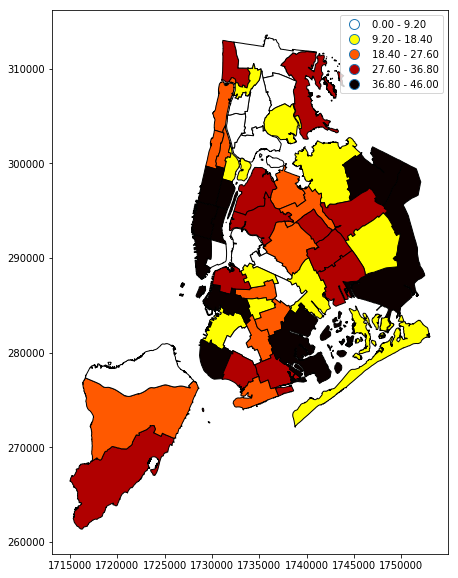

In [32]:
ShapeData.crs = from_epsg(4326)
naec = '+proj=eqdc +lat_0=40 +lon_0=-96 +lat_1=20 +lat_2=60 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs'
ShapeData.to_crs(naec).plot(column='Percent', edgecolor='black',figsize=(10,10),legend=True, cmap = 'hot_r', scheme = 'equal_interval')

Here is a cloropleth of the percentage of households with broadband access in the NYC area broken down by Public Use Microdata Areas. Notice where the areas are darker, there is a higher percent of internet coverage. The inequality is interesting where the outter boughroughs such as the Bronx and Queens have much lower percent of internet.

# 4. LinkNYC: assess whether the locations of the linkNYC stations are supplying internet where it is needed.


In [ ]:
#Move 
os.rename("/nfshome/sjs909/PUI2018/PUI2018_fb55/HW7_fb55/linkNYClocations.csv", "/nfshome/sjs909/PUIDATA/linkNYClocations.csv")


In [33]:
linkNYC =  pd.read_csv("%s/linkNYClocations.csv"%os.getenv("PUIDATA"))

In [34]:
linkNYC.drop(['Unnamed: 0'],axis=1,inplace=True )

In [45]:
linkNYC.shape

(1414, 4)

Combine long lat into a column like you did in the lab to greate a "geometry" column for the dataframe, then convert the dataframe into a GeoDataFrame linkNYC and set native coordinates frame to lat/lon as you did in the lab

In [35]:
# combine lat and lon to one column
linkNYC['lonlat']=list(zip(linkNYC.longitude,linkNYC.latitude))

In [36]:
# Create Point Geometry for based on lonlat column
linkNYC['geometry']=linkNYC[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
linkNYC.head()

,link_site,longitude,date_link_,latitude,lonlat,geometry
0,bk-01-138951,-73.942489,2017-07-01,40.701668,"(-73.94248859, 40.70166753)",POINT (-73.94248859 40.70166753)
1,bk-01-109091,-73.942169,2017-07-01,40.701542,"(-73.9421692831, 40.7015421938)",POINT (-73.9421692831 40.7015421938)
2,bk-01-143982,-73.942239,2017-07-01,40.701930,"(-73.9422392385, 40.7019303439)",POINT (-73.94223923850001 40.7019303439)
3,bk-01-109262,-73.942918,2017-04-28,40.705060,"(-73.94291758, 40.70506042)",POINT (-73.94291758 40.70506042)
4,bk-01-125268,-73.953439,2017-03-31,40.728133,"(-73.953439, 40.728133)",POINT (-73.953439 40.728133)


Intersect the two geometries

In [37]:
linkNYC = GeoDataFrame(linkNYC)

In [38]:
linkNYC.crs = from_epsg(4326)
ShapeData.crs

{'init': 'epsg:4326', 'no_defs': True}

In [39]:
linkNYC_ft = linkNYC.to_crs(epsg=2263)
ShapeData_ft = ShapeData.to_crs(epsg=2263)

In [51]:
linkNYC.head()

,link_site,longitude,date_link_,latitude,lonlat,geometry
0,bk-01-138951,-73.942489,2017-07-01,40.701668,"(-73.94248859, 40.70166753)",POINT (-73.94248859 40.70166753)
1,bk-01-109091,-73.942169,2017-07-01,40.701542,"(-73.9421692831, 40.7015421938)",POINT (-73.9421692831 40.7015421938)
2,bk-01-143982,-73.942239,2017-07-01,40.701930,"(-73.9422392385, 40.7019303439)",POINT (-73.94223923850001 40.7019303439)
3,bk-01-109262,-73.942918,2017-04-28,40.705060,"(-73.94291758, 40.70506042)",POINT (-73.94291758 40.70506042)
4,bk-01-125268,-73.953439,2017-03-31,40.728133,"(-73.953439, 40.728133)",POINT (-73.953439 40.728133)


In [40]:
Joined = sjoin(linkNYC_ft, ShapeData_ft)

In [53]:
Joined.head()

,link_site,longitude,date_link_,latitude,lonlat,geometry,index_right,geoID,shape_area,shape_leng,Broadband,NAME,HH,pcBB,Percent,Margin of Error,diff
0,bk-01-138951,-73.942489,2017-07-01,40.701668,"(-73.94248859, 40.70166753)",POINT (1000196.411360609 194918.1045344363),29,4001,1.149292e+08,74076.375782,46643,NYC-Brooklyn Community District 1--Greenpoint ...,66037,70.631616,70.6,2.8,0.031616
1,bk-01-109091,-73.942169,2017-07-01,40.701542,"(-73.9421692831, 40.7015421938)",POINT (1000284.976955119 194872.4991186759),29,4001,1.149292e+08,74076.375782,46643,NYC-Brooklyn Community District 1--Greenpoint ...,66037,70.631616,70.6,2.8,0.031616
2,bk-01-143982,-73.942239,2017-07-01,40.701930,"(-73.9422392385, 40.7019303439)",POINT (1000265.48686938 195013.900946364),29,4001,1.149292e+08,74076.375782,46643,NYC-Brooklyn Community District 1--Greenpoint ...,66037,70.631616,70.6,2.8,0.031616
3,bk-01-109262,-73.942918,2017-04-28,40.705060,"(-73.94291758, 40.70506042)",POINT (1000076.658138533 196154.157733508),29,4001,1.149292e+08,74076.375782,46643,NYC-Brooklyn Community District 1--Greenpoint ...,66037,70.631616,70.6,2.8,0.031616
4,bk-01-125268,-73.953439,2017-03-31,40.728133,"(-73.953439, 40.728133)",POINT (997155.0239397929 204558.4761382252),29,4001,1.149292e+08,74076.375782,46643,NYC-Brooklyn Community District 1--Greenpoint ...,66037,70.631616,70.6,2.8,0.031616


In [41]:
linkNYC.crs = from_epsg(4326)
naec = '+proj=eqdc +lat_0=40 +lon_0=-96 +lat_1=20 +lat_2=60 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs'

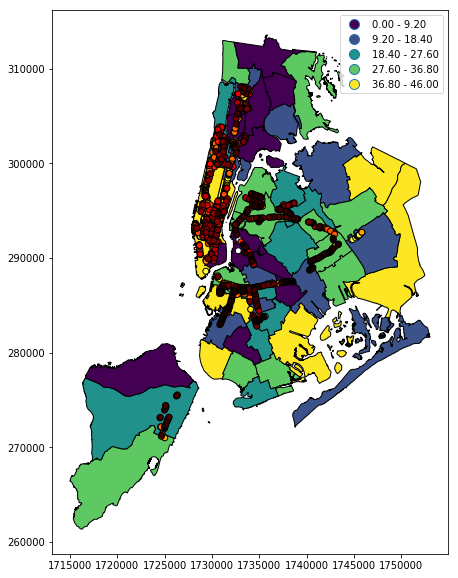

In [42]:
base = ShapeData.to_crs(naec).plot(column='Percent', edgecolor='black',figsize=(10,10),legend=True, cmap = 'viridis', scheme = 'equal_interval')

linkNYC.to_crs(naec).plot(edgecolor='black',figsize=(10,10),legend=True,ax=base, cmap = 'hot_r', scheme = 'equal_interval')


Here is the same map of internet broadband coverage broken down by PUMA, now with the exact location of the linkNYC kiosks added. It seems that these are distributed rather equally throuhought Manhattan, however the upper Bronx, upper Staten Island, Lower Brooklyn and outter Queens do not have any. Furthermore, these areas are not well covered by internet.

# 5 Find the number of linkNYC locations per person by PUMA

5.1 with the AFF API from ACS get the total population by puma and merge it into your GeoDF

In [43]:
keyNtp = 'B00001_001E'
aff1y['variables'][keyNtp]

{'attributes': 'B00001_001EA',
 'concept': 'UNWEIGHTED SAMPLE COUNT OF THE POPULATION',
 'group': 'B00001',
 'label': 'Estimate!!Total',
 'limit': 0,
 'predicateType': 'int'}

In [ ]:
# Now we use this variable name to extract the relevant data with the ACS API

In [44]:
# getting the population
url = "https://api.census.gov/data/2016/acs/acs1?get=" + keyNtp +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPI
resp = requests.request('GET', url).content
pumatp = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))


In [58]:
pumatp.head()

,B00001_001E,NAME,state,public use microdata area,Unnamed: 4
0,3075,"St. Lawrence County PUMA, New York",36,100,NaN
1,4356,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,2736,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,2722,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,2874,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN


In [45]:
pumatp = pumatp.rename(columns={'public use microdata area':'puma'})

In [46]:
# Now lets merge it into your ShapeData file
popShapeFile = ShapeData.merge(pumatp, left_on='geoID',right_on='puma')
popShapeFile.head()

,geoID,shape_area,shape_leng,geometry,Broadband,NAME_x,HH,pcBB,Percent,Margin of Error,diff,B00001_001E,NAME_y,state,puma,Unnamed: 4
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...,35529,"NYC-Bronx Community District 8--Riverdale, Fie...",42158,84.275820,84.3,2.6,0.024180,1517,"NYC-Bronx Community District 8--Riverdale, Fie...",36,3701,NaN
1,3702,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,...",34030,"NYC-Bronx Community District 12--Wakefield, Wi...",49817,68.310015,68.3,3.7,0.010015,1959,"NYC-Bronx Community District 12--Wakefield, Wi...",36,3702,NaN
2,3703,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...,36716,"NYC-Bronx Community District 10--Co-op City, P...",44329,82.826141,82.8,3.2,0.026141,1305,"NYC-Bronx Community District 10--Co-op City, P...",36,3703,NaN
3,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,...",32269,NYC-Bronx Community District 11--Pelham Parkwa...,44476,72.553737,72.6,3.6,0.046263,1882,NYC-Bronx Community District 11--Pelham Parkwa...,36,3704,NaN
4,4015,8.105438e+07,50007.415493,POLYGON ((-73.95374853778468 40.63858633758547...,44079,NYC-Brooklyn Community District 14--Flatbush &...,55953,78.778618,78.8,2.9,0.021382,2515,NYC-Brooklyn Community District 14--Flatbush &...,36,4015,NaN


In [ ]:
# 5.2 find the number of station per 100 people per PUMA

Important you can do this with an sjoin(). But sjoin() should not be used with lat/lon coordinates cause they are not "flat coordinates". Since spattial joins are done in cartesian geometry the only coordinate systems suitable to spatial joins are flat coordinate plane systems, which in the NYC area is 2263. So before you proceed to the sjoin you have to convert both pumashp and linkNYC to 2263 (for example with GeoDataFrame method .to_crs(epsg=...) )

In [47]:
# convert the popShapeFile and linkNYC to 2263
popShapeFile = GeoDataFrame(popShapeFile)
linkNYC = GeoDataFrame(linkNYC)
popShapeFile.crs = from_epsg(4326)
linkNYC.crs = from_epsg(4326)

In [48]:
popShapeFile_ft = popShapeFile.to_crs(epsg=2263)
linkNYC_ft = linkNYC.to_crs(epsg=2263)

In [49]:
Joined = sjoin(popShapeFile_ft, linkNYC_ft)

In [66]:
Joined.head()

,geoID,shape_area,shape_leng,geometry,Broadband,NAME_x,HH,pcBB,Percent,Margin of Error,...,NAME_y,state,puma,Unnamed: 4,index_right,link_site,longitude,date_link_,latitude,lonlat
0,3701,9.792852e+07,53227.144461,"POLYGON ((1012885.033996583 268830.4841918442,...",35529,"NYC-Bronx Community District 8--Riverdale, Fie...",42158,84.275820,84.3,2.6,...,"NYC-Bronx Community District 8--Riverdale, Fie...",36,3701,NaN,1286,bx-08-145850,-73.902101,2017-06-10,40.868698,"(-73.9021009, 40.86869849)"
4,4015,8.105438e+07,50007.415493,"POLYGON ((997086.4570312516 171933.9880370507,...",44079,NYC-Brooklyn Community District 14--Flatbush &...,55953,78.778618,78.8,2.9,...,NYC-Brooklyn Community District 14--Flatbush &...,36,4015,NaN,1218,bk-14-145758,-73.957990,2017-03-03,40.643941,"(-73.95799026, 40.64394086)"
4,4015,8.105438e+07,50007.415493,"POLYGON ((997086.4570312516 171933.9880370507,...",44079,NYC-Brooklyn Community District 14--Flatbush &...,55953,78.778618,78.8,2.9,...,NYC-Brooklyn Community District 14--Flatbush &...,36,4015,NaN,1216,bk-14-145789,-73.958144,2017-03-06,40.645262,"(-73.95814408, 40.6452617)"
4,4015,8.105438e+07,50007.415493,"POLYGON ((997086.4570312516 171933.9880370507,...",44079,NYC-Brooklyn Community District 14--Flatbush &...,55953,78.778618,78.8,2.9,...,NYC-Brooklyn Community District 14--Flatbush &...,36,4015,NaN,1215,bk-14-145814,-73.958203,2017-04-08,40.646179,"(-73.95820347, 40.64617918)"
6,3705,1.224951e+08,68657.316149,"POLYGON ((1019225.58178711 245263.8524169383, ...",40757,"NYC-Bronx Community District 3 & 6--Belmont, C...",58706,69.425612,69.4,3.2,...,"NYC-Bronx Community District 3 & 6--Belmont, C...",36,3705,NaN,927,bx-06-118922,-73.898221,2017-10-20,40.846926,"(-73.898220556, 40.8469261747)"


create a geodataframe with a spatial join and use groupby to count the number of linkNYC in each PUMA

In [50]:
linkpp = sjoin(popShapeFile_ft, linkNYC_ft).groupby('puma').count()
linkpp.head()

,geoID,shape_area,shape_leng,geometry,Broadband,NAME_x,HH,pcBB,Percent,Margin of Error,...,B00001_001E,NAME_y,state,Unnamed: 4,index_right,link_site,longitude,date_link_,latitude,lonlat
puma,,,,,,,,,,,,,,,,,,,,,
3701,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
3705,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
3706,20,20,20,20,20,20,20,20,20,20,...,20,20,20,0,20,20,20,20,20,20
3707,29,29,29,29,29,29,29,29,29,29,...,29,29,29,0,29,29,29,29,29,29
3708,19,19,19,19,19,19,19,19,19,19,...,19,19,19,0,19,19,19,19,19,19


In [68]:
linkpp.columns

Index(['geoID', 'shape_area', 'shape_leng', 'geometry', 'Broadband', 'NAME_x',
       'HH', 'pcBB', 'Percent', 'Margin of Error', 'diff', 'B00001_001E',
       'NAME_y', 'state', 'Unnamed: 4', 'index_right', 'link_site',
       'longitude', 'date_link_', 'latitude', 'lonlat'],
      dtype='object')

In [51]:
GroupNYC = linkpp.drop(['shape_area', 'shape_leng', 'geometry', 'Broadband', 'NAME_x', 'geoID',
       'HH', 'pcBB', 'Percent', 'Margin of Error', 'diff', 'B00001_001E',
       'NAME_y', 'state', 'Unnamed: 4', 'index_right',
       'longitude', 'date_link_', 'latitude', 'lonlat'],axis=1)

In [52]:
GroupNYC.head()

,link_site
puma,
3701,1
3705,1
3706,20
3707,29
3708,19


count the number of linkNYC in each PUMA

In [53]:
GroupNYC.reset_index(level=0, inplace=True)

finally merge back into the pumashp. Make sure you use the correct scheme for merging: you want to have all the PUMAs, not only the ones that have linkNYC in them in the final geoDF

In [54]:
NYCLinkCountandShape = popShapeFile.merge(GroupNYC, on="puma",how='outer')

In [55]:
NYCLinkCountandShape["linkNYCp100p"] = (NYCLinkCountandShape["link_site"]/NYCLinkCountandShape["B00001_001E"])*100

In [56]:
NYCLinkCountandShape["linkNYCp100p"].describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


count    37.000000
mean      2.327677
std       3.328955
min       0.049727
25%            NaN
50%            NaN
75%            NaN
max      15.141540
Name: linkNYCp100p, dtype: float64

In [57]:
NYCLinkCountandShape = NYCLinkCountandShape.drop('Unnamed: 4',axis=1)

In [58]:
NYCLinkCountandShape.rename(columns={'B00001_001E':'Population'},inplace=True)

In [84]:
NYCLinkCountandShape.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,geoID,shape_area,shape_leng,Broadband,HH,pcBB,diff,Population,state,puma,link_site,linkNYCp100p
count,55.000000,5.500000e+01,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.0,55.000000,37.000000,37.000000
mean,3936.218182,1.532632e+08,91547.959548,45287.254545,56633.272727,79.462797,0.027518,2138.618182,36.0,3936.218182,38.216216,2.327677
std,149.997616,1.361440e+08,77522.481125,14410.514427,14874.212875,7.548276,0.013269,699.237163,0.0,149.997616,46.499782,3.328955
min,3701.000000,3.984279e+07,34852.437966,27834.000000,37998.000000,54.932945,0.001693,1238.000000,36.0,3701.000000,1.000000,0.049727
25%,3804.500000,7.498814e+07,48072.809133,35658.500000,45822.500000,74.772059,0.020397,1554.000000,36.0,3804.500000,NaN,NaN
50%,4005.000000,1.070001e+08,70492.955589,41578.000000,52591.000000,79.301693,0.027634,2004.000000,36.0,4005.000000,NaN,NaN
75%,4059.500000,1.692189e+08,98789.538654,50273.000000,62501.500000,85.127599,0.039522,2383.500000,36.0,4059.500000,NaN,NaN
max,4114.000000,6.760200e+08,412606.741739,102520.000000,111507.000000,93.030650,0.049841,4001.000000,36.0,4114.000000,230.000000,15.141540


# at last, plot the linkNYC locations on top of a choropleth of number of stations per 100 people in 10 equal intervals

In [60]:
NYCLinkCountandShape.crs = from_epsg(4326)
naec = '+proj=eqdc +lat_0=40 +lon_0=-96 +lat_1=20 +lat_2=60 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs'

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3142: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


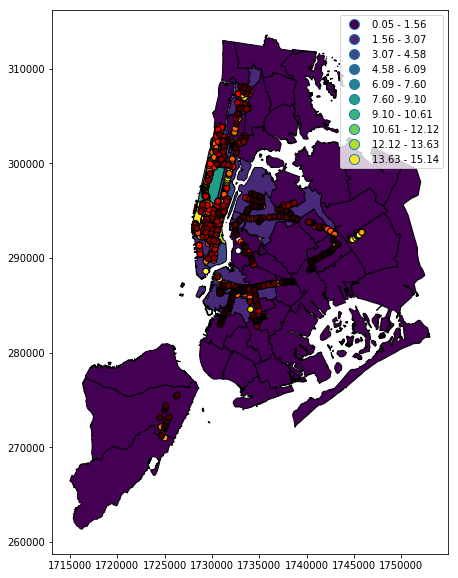

In [61]:
base = NYCLinkCountandShape.to_crs(naec).plot(column='linkNYCp100p', edgecolor='black',k =10, figsize=(10,10),legend=True, cmap = 'viridis', scheme = 'equal_interval')

linkNYC.to_crs(naec).plot(edgecolor='black',figsize=(10,10),legend=True,ax=base, cmap = 'hot_r', scheme = 'equal_interval')


The final graph! Yay, this shows the population percentage per linkNYC location. It seems the highest concentration of population has the most amount of internet Kiosks.

# Extra credit 1:
How would you enhance the visibility of this map? you are working with numbers that are mostly very low, and reside near each other, and them have a few much higher value points. Notice that here the high values are interesting though and should not be thrown away!

In [83]:
# You can change the scheme to quantile, used to enhance the color differences 

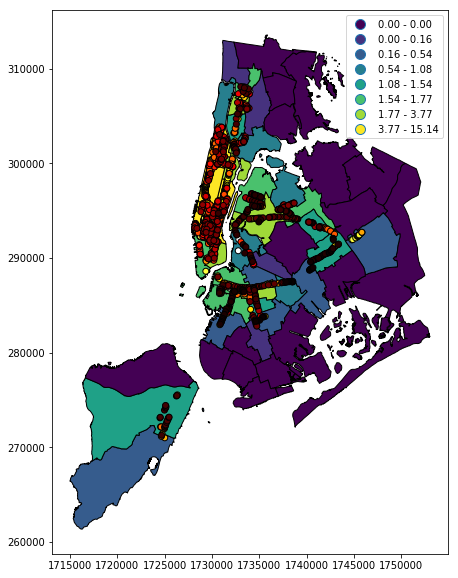

In [96]:
base = NYCLinkCountandShape.to_crs(naec).plot(column='linkNYCp100p', edgecolor='black', figsize=(10,10),legend=True, k=10, scheme = 'quantiles')

linkNYC.to_crs(naec).plot(edgecolor='black',figsize=(10,10),legend=True,ax=base, cmap = 'hot_r', scheme = 'equal_interval')


In [63]:
%mkdir Output

In [68]:
path='Output/NYCLinkCountandShape.shp'
NYCLinkCountandShape.to_file(path)

In [69]:
import pysal as ps

In [70]:
qW_CT=ps.queen_from_shapefile(path)

In [71]:

qW_CT[10]

{6: 1.0, 8: 1.0, 12: 1.0}

In [72]:
qW_CT.cardinalities[10]

3

In [73]:
qW_CT.islands

[]

In [74]:
# Matrix of weights
Wmatrix, ids = qW_CT.full()

In [75]:

Wmatrix

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [76]:
qW_CT.transform = 'r'

In [77]:
qW_CT.full()[0]

array([[ 0.        ,  0.33333333,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2       ,  0.        ,  0.2       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.33333333,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.5       ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.2       ,  0.        ]])

In [78]:
NYCLinkCountandShape.head()

,geoID,shape_area,shape_leng,geometry,Broadband,NAME_x,HH,pcBB,Percent,Margin of Error,diff,Population,NAME_y,state,puma,link_site,linkNYCp100p
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...,35529,"NYC-Bronx Community District 8--Riverdale, Fie...",42158,84.275820,84.3,2.6,0.024180,1517,"NYC-Bronx Community District 8--Riverdale, Fie...",36,3701,1.0,0.065920
1,3702,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,...",34030,"NYC-Bronx Community District 12--Wakefield, Wi...",49817,68.310015,68.3,3.7,0.010015,1959,"NYC-Bronx Community District 12--Wakefield, Wi...",36,3702,NaN,NaN
2,3703,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...,36716,"NYC-Bronx Community District 10--Co-op City, P...",44329,82.826141,82.8,3.2,0.026141,1305,"NYC-Bronx Community District 10--Co-op City, P...",36,3703,NaN,NaN
3,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,...",32269,NYC-Bronx Community District 11--Pelham Parkwa...,44476,72.553737,72.6,3.6,0.046263,1882,NYC-Bronx Community District 11--Pelham Parkwa...,36,3704,NaN,NaN
4,4015,8.105438e+07,50007.415493,POLYGON ((-73.95374853778468 40.63858633758547...,44079,NYC-Brooklyn Community District 14--Flatbush &...,55953,78.778618,78.8,2.9,0.021382,2515,NYC-Brooklyn Community District 14--Flatbush &...,36,4015,3.0,0.119284


In [90]:
NYCLinkCountandShape= NYCLinkCountandShape.fillna(0)
NYCLinkCountandShape.linkNYCp100p


0      0.065920
1      0.000000
2      0.000000
3      0.000000
4      0.119284
5      0.000000
6      0.049727
7      1.569859
8      1.873385
9      1.787649
10     1.299590
11     0.000000
12     0.948104
13     0.792910
14     1.156069
15     0.499319
16     5.752841
17     0.000000
18     4.478708
19     2.379286
20     3.973139
21     8.048290
22    15.141540
23    13.247173
24     3.455964
25     1.588142
26     0.189036
27     1.192748
28     0.000000
29     1.029654
30     0.056850
31     0.350000
32     1.599016
33     1.694915
34     0.591716
35     0.538358
36     0.450857
37     0.000000
38     0.000000
39     0.000000
40     1.704545
41     0.884132
42     0.000000
43     0.000000
44     0.000000
45     0.000000
46     1.767215
47     1.420959
48     2.689873
49     0.000000
50     1.280410
51     0.456853
52     0.000000
53     0.000000
54     0.000000
Name: linkNYCp100p, dtype: float64

In [93]:
linkNYCProp.head()

0    0.065920
1    0.000000
2    0.000000
3    0.000000
4    0.119284
Name: linkNYCp100p, dtype: float64

In [92]:
linkNYCProp=NYCLinkCountandShape.linkNYCp100p
linkNYCPropLag=ps.lag_spatial(qW_CT, linkNYCProp)

In [94]:
linkNYCPropLagQ10 = ps.Quantiles(linkNYCPropLag, k=10)
linkNYCPropLagQ10

              Quantiles              
 
Lower          Upper            Count
        x[i] <= 0.017               6
0.017 < x[i] <= 0.211               5
0.211 < x[i] <= 0.463               6
0.463 < x[i] <= 0.578               5
0.578 < x[i] <= 0.788               6
0.788 < x[i] <= 0.989               5
0.989 < x[i] <= 1.193               6
1.193 < x[i] <= 2.997               5
2.997 < x[i] <= 5.159               5
5.159 < x[i] <= 9.704               6

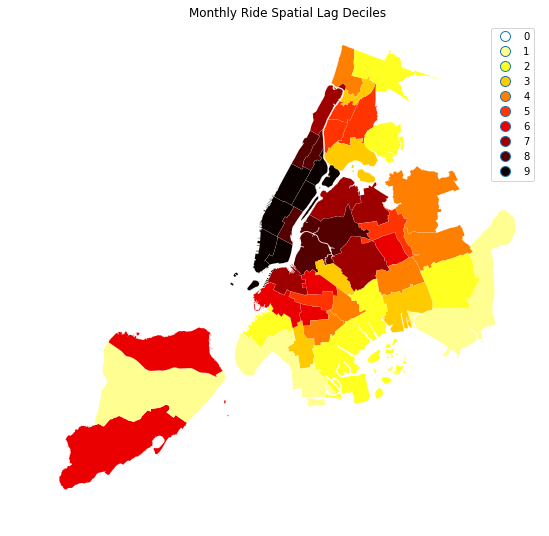

In [95]:
f, ax = plt.subplots(figsize=(9, 9))
NYCLinkCountandShape.assign(cl=linkNYCPropLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Monthly Ride Spatial Lag Deciles");

In [97]:
b,a = np.polyfit(linkNYCProp, linkNYCPropLag, 1)
b,a

(0.49457984322374438, 0.87112386582327872)

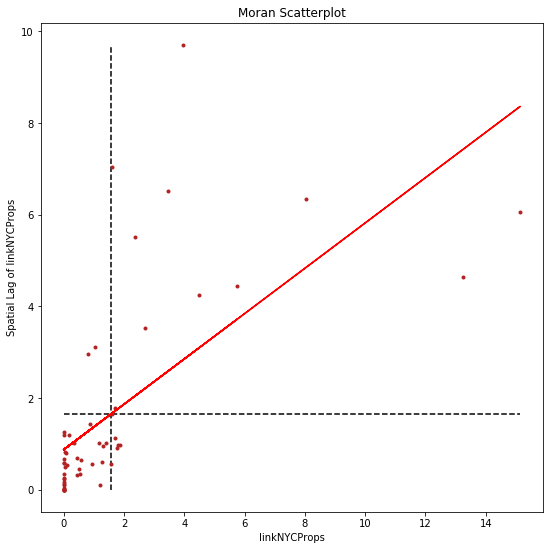

In [99]:
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(linkNYCProp, linkNYCPropLag, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(linkNYCProp.mean(), linkNYCPropLag.min(), linkNYCPropLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(linkNYCPropLag.mean(), linkNYCProp.min(), linkNYCProp.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(linkNYCProp, a + b*linkNYCProp, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of linkNYCProps')
plt.xlabel('linkNYCProps');
